In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import requests
from PIL import Image as PILImage
from io import BytesIO
import requests
import pandas as pd
import threading

In [2]:
df = pd.read_csv('2.6data.csv',index_col=False)

In [3]:
df.insert(0, 'Id', range(5000, 5000 + len(df)))

MissingSchema: Invalid URL 'T': No scheme supplied. Perhaps you meant https://T?

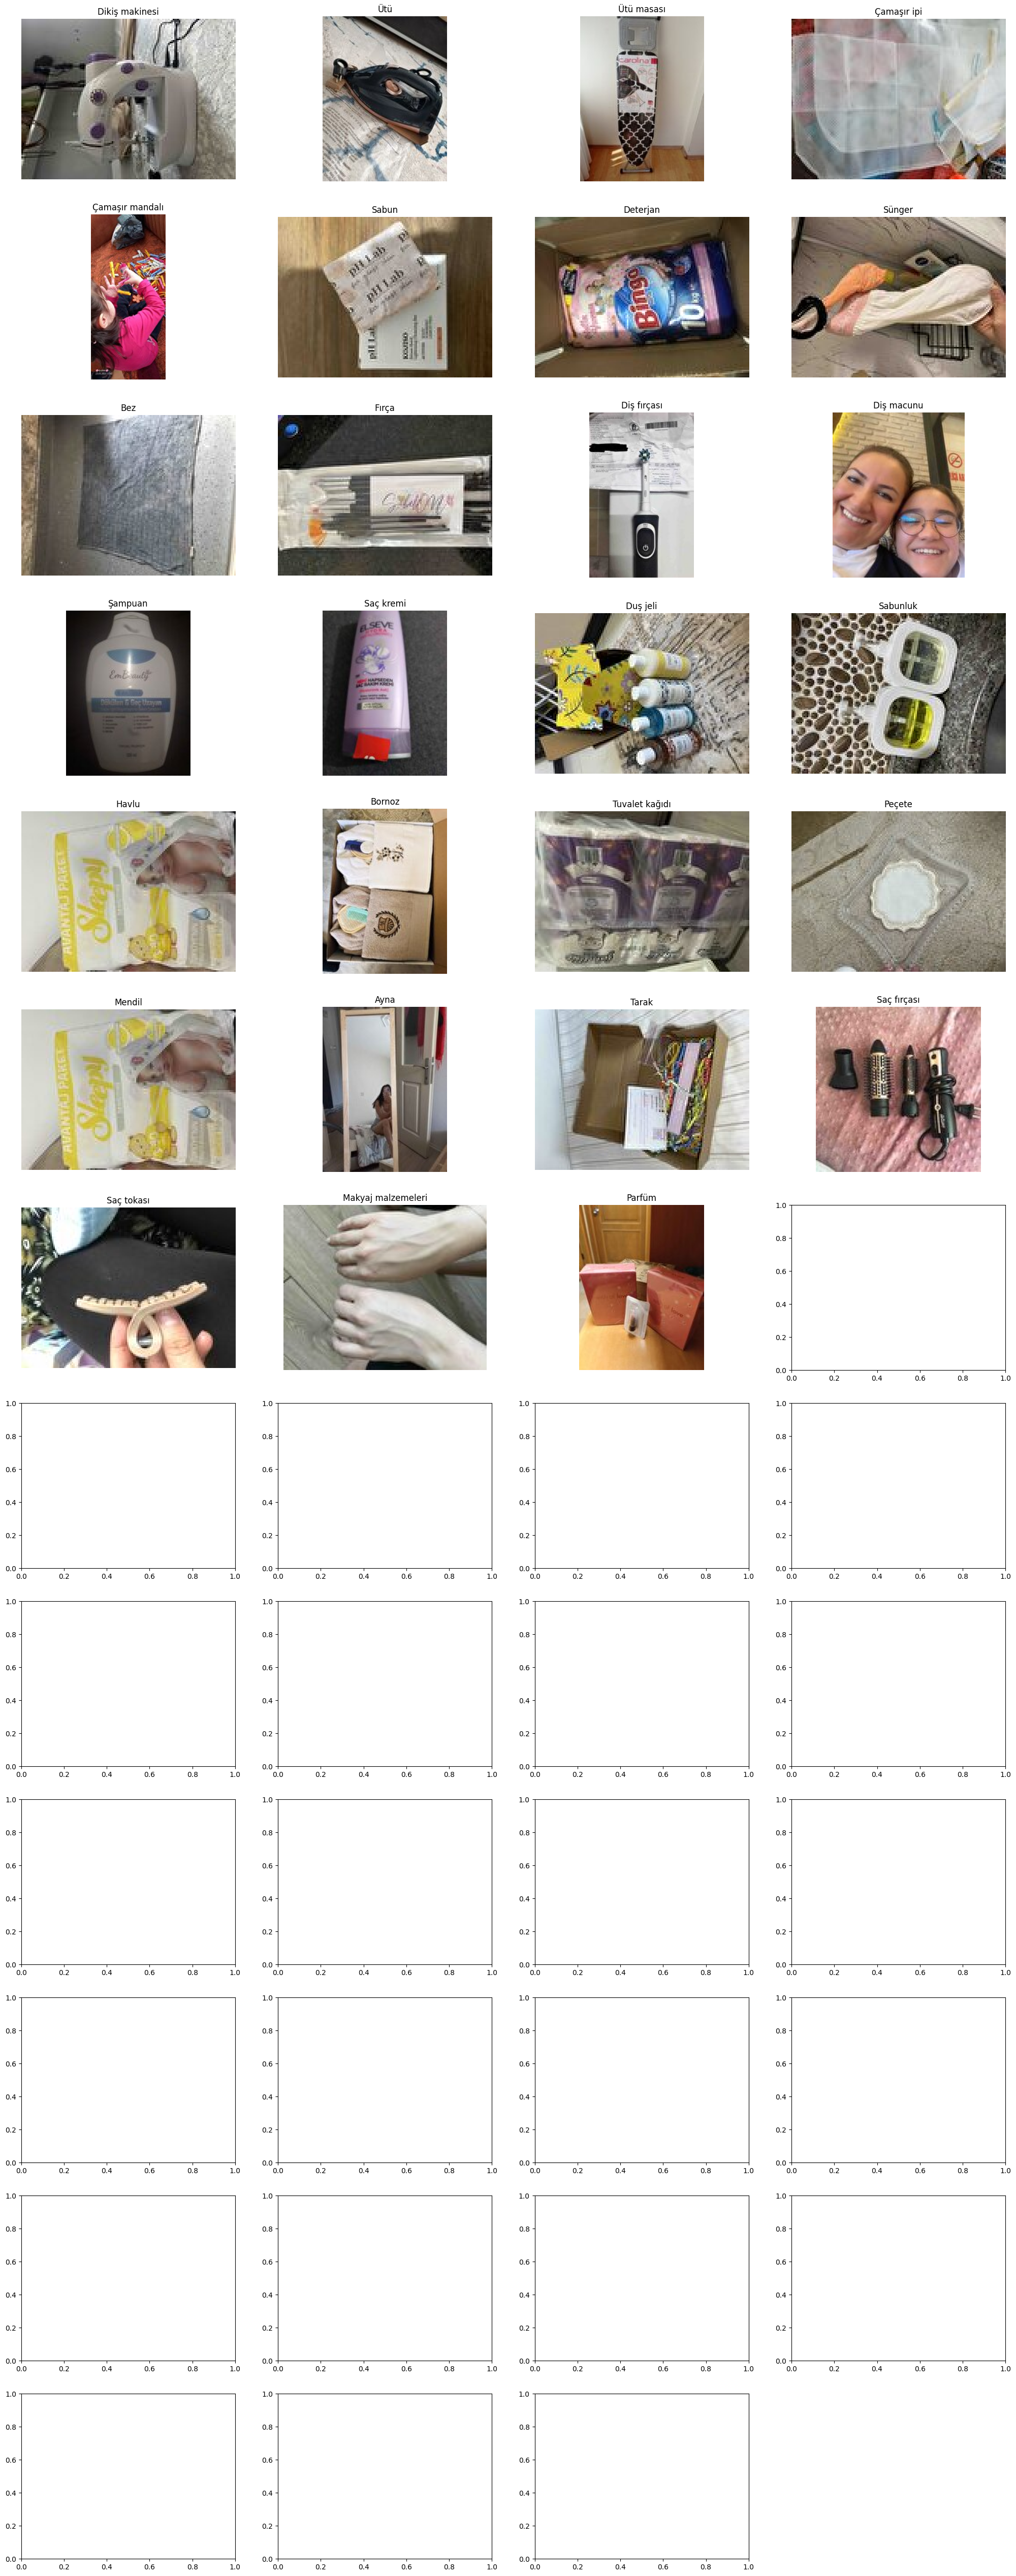

In [14]:
row_number = len(df['searched_key_word'].unique())//4 + 1
fig, axes = plt.subplots(nrows=row_number, ncols=4, figsize=(25, 5*row_number))
plt.axis('off')

col = 0
row = 0
for i in df['searched_key_word'].unique():
    image_path = df['image_path'][df['searched_key_word']== i ].head(1).values[0]

    response = requests.get(image_path)
    img = PILImage.open(BytesIO(response.content))
    axes[row, col].imshow(img)
    axes[row, col].set_title(i)
    axes[row, col].axis('off')
    col += 1

    if col == 4:
        col = 0
        row += 1

for r in range(row_number):
    for c in range(4):
        if r * 4 + c >= len(df['searched_key_word'].unique()):
            axes[r, c].axis('off')  # Kullanılmayan eksenleri kapat

plt.tight_layout()
plt.show()

In [4]:
#df_cleaned =  pd.DataFrame(columns=['Id','product_name','width','height','image_path'])
df_cleaned = pd.read_csv('3.3data.csv')
df_cleaned.tail(4)

Id                                      product_name  width  height  \
19047  8180  365_Fonksiyonel_Rende_Ve_Dilimleme_Aparatı_Siyah   10.0    25.0   
19048  8181  365_Fonksiyonel_Rende_Ve_Dilimleme_Aparatı_Siyah   10.0    25.0   
19049  8182  365_Fonksiyonel_Rende_Ve_Dilimleme_Aparatı_Siyah   10.0    25.0   
19050  8183  365_Fonksiyonel_Rende_Ve_Dilimleme_Aparatı_Siyah   10.0    25.0   

                                              image_path  
19047  https://review-rating.mncdn.com/mnresize/140/2...  
19048  https://review-rating.mncdn.com/mnresize/140/2...  
19049  https://review-rating.mncdn.com/mnresize/140/2...  
19050  https://review-rating.mncdn.com/mnresize/140/2...

In [5]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
df_filtered = pd.concat([df[df['title'] == search].head(1) for search in df['title'].unique()], ignore_index=True)

df_filtered

Id               searched_key_word                          brand  \
0     5000                          Termos                        Penguen   
1     5060                          Termos                         Karaca   
2     5120                          Termos                 Genel Markalar   
3     5180                          Termos                        Stanley   
4     5240                          Termos                         Cooker   
5     5300                          Termos                        Schafer   
6     5360                          Termos                      Decathlon   
7     5380                          Termos                     İkon store   
8     5404                          Termos                         Karaca   
9     5464                          Termos                    Vivien Home   
10    5524                          Termos                        Stanley   
11    5584                          Termos                         Stevig   
12    5604                          Termos                         Karaca   
13    5664                          Termos                        Stanley   
14    5724                       Su şişesi                      MUTLUHOME   
15    5784                       Su şişesi               Seram Collection   
16    5844                       Su şişesi                       valletta   
17    5904                       Su şişesi                        BEYZANA   
18    5964                       Su şişesi                  M Mimoza Park   
19    6024                       Su şişesi                       KÜÇÜK EW   
20    6084                       Su şişesi                 Genel Markalar   
21    6144                       Su şişesi                          Duffa   
22    6191                       Su şişesi          Anadolu Saray Çarşısı   
23    6211                       Su şişesi                    MİMOZA PARK   
24    6221                     Kupa bardak                 Genel Markalar   
25    6281                     Kupa bardak                   OYART&DESIGN   
26    6301                     Kupa bardak                  Anadolu Saray   
27    6361                     Kupa bardak                İlbay Çini Takı   
28    6421                     Kupa bardak                    Madame Coco   
29    6481                     Kupa bardak                         Karaca   
30    6541                     Kupa bardak                   OYART&DESIGN   
31    6548                     Kupa bardak                     Cool Stuff   
32    6556                        Kalemlik                        Quality   
33    6580                        Kalemlik                      Koza Home   
34    6604                        Kalemlik                         NZCLUB   
35    6664                        Kalemlik                   RKY SERENITY   
36    6724                        Kalemlik            Nostaljik Lezzetler   
37    6784                        Kalemlik                 dkacollections   
38    6793                        Kalemlik                          Notpa   
39    6853                        Kalemlik                          Limmy   
40    6866                        Kalemlik                     designedfy   
41    6926                        Kalemlik                    DERKADESİGN   
42    6986                        Kalemlik                      Contact’S   
43    7010                        Kalemlik               UYGUN ELEKTRONİK   
44    7034                        Kalemlik                     pamukcanta   
45    7093                     Gözlük kabı                         wearme   
46    7117                     Gözlük kabı                       Aftaries   
47    7141                     Gözlük kabı                   Bayduk Optik   
48    7201                     Gözlük kabı                        Ray-Ban   
49    7261                     Gözlük kabı                 Silvio Monetti   
50    7321                     Gözlük kabı                 Genel Markalar   
51  

In [42]:
for name in df['title'].unique():
    single_word = name.replace(' ','_')
    if len(df_cleaned[df_cleaned['product_name']==single_word]) == 0:
        images_paths = df['image_path'][df['title']==name]
        print('title: ' + name)
        print('searched_key_word: ' + df_filtered['searched_key_word'][df_filtered['title']==name].values[0])
        print(df_filtered['image_path'][df_filtered['title']==name].values[0])
        filtered_data = df_filtered[df_filtered['title'] == name][['find_dim', 'find_dim_from_content', 'guess_dimensions', 'guess_dim_from_comment']].values[0]
        print(filtered_data)
        height = float(input( 'height: '))
        width = float(input('width: '))
        for img in images_paths:
            product_name = single_word
            Id = df.loc[df['image_path']==img,'Id'].values[0]
            df_cleaned.loc[len(df_cleaned)] = [Id, product_name, width,height, img]

title: Otomatik Kapaklı Suluk & Matara 30499 Kırmızı & Mavi & Yeş
searched_key_word: suluk
https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2023910/2043850/303366473/71947736-1690461780874.jpeg
['[]' "['24cm / 700ml']" nan nan]


height:  24
width:  0


title: 600 ML POLYKARBON GEYİKLİ MATARA PİPETLİ OTOMATİK KAPAKLI 20 CM UZUNLU
searched_key_word: suluk
https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2019922/2041856/813617100/113020862-1737630231170.jpeg
["['20 cm uzunluğundaki kompakt boyutu, çantanızda rahatça taşıyabileceğiniz ideal bir boyuttadır']"
 nan nan nan]


height:  20
width:  0


title: Borosilikat H2o Cam Matara Suluk 1 Litre
searched_key_word: suluk
https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2020919/2044847/71682351/3692389-1682665571690.jpeg
['[]' nan 'boy 24 cm genişlik 8 cmdir.' nan]


height:  24
width:  8


title: X-light Kılıflı Cam Matara Yeşil 750 Ml
searched_key_word: suluk
https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2035874/789403580/26492618-1739812104943.jpeg
["['ÖLÇÜLER: 6 X 25 CM']" nan nan nan]


height:  25
width:  6


title: ermer Desenli Tekli Puro Küllüğü ve 1 Adet Bardak Altlığı 2 adet Viski Taşı 1 Adet Mumluk
searched_key_word: tekli Mum
T
["['25 mm kalınlığa kadar purolar için kullanılabilir.', 'Mermer desenli bardak altlığı ile tamamlayıcı bir görünüm sunar ve içeceğinizi şık bir şekilde servis etmenize olanak tanır İki adet viski taşı ile gelen bu set, hem dekoratif hem de işlevsel bir aksesuar olarak kullanım imkanı sağlar Ölçüler: 12 cm x 6,5 cm x 2,5 cm.']"
 nan nan nan]


KeyboardInterrupt: Interrupted by user

In [41]:
df_cleaned.tail(2)

Id                                              product_name  width  \
40556  26516  Motivasyon_Matara_2000_Ml_Suluk,_Su_Şişesi_-_Bpa_Içermez    0.0   
40557  26517  Motivasyon_Matara_2000_Ml_Suluk,_Su_Şişesi_-_Bpa_Içermez    0.0   

       height  \
40556    30.0   
40557    30.0   

                                                                                                                    image_path  
40556  https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2028895/2036871/756481862/63433431-1703069062754.jpeg  
40557  https://review-rating.mncdn.com/mnresize/140/210/prod/img/2017928/2019922/2043850/756481862/40135161-1708938847163.jpeg

In [40]:
df_cleaned.loc[df_cleaned['product_name'] == 'Motivasyon_Matara_2000_Ml_Suluk,_Su_Şişesi_-_Bpa_Içermez', 'width'] = 0

In [43]:
df_cleaned.to_csv('3.4data.csv', index= False)

In [75]:
import os
from tqdm import tqdm

# Folder where the images will be saved
save_dir = "dimension_images"
os.makedirs(save_dir, exist_ok=True)

# Extract URLs and IDs from the DataFrame
for _, row in tqdm(df.iterrows(), total=len(df), desc="Downloading images"):
    product_id = row[0]  # Second column (e.g., 4758, 4759, etc.)
    product_name = row[1]  # Third column (e.g., glass_cleaning_device)
    url = row[4]  # Sixth column (URL)

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error if there is an HTTP issue

        # Generate the file name (example: glass_cleaning_device_4758.jpg)
        file_name = os.path.join(save_dir, f"{product_name}_{product_id}.jpg")

        # Save the image
        with open(file_name, "wb") as img_file:
            img_file.write(response.content)

    except Exception as e:
        print(f"Error! Failed to download {url}: {e}")

print("Download completed.")

  product_id = row[0]  # Second column (e.g., 4758, 4759, etc.)
C:\Users\Gökhan ergül\AppData\Local\Temp\ipykernel_14188\1999954361.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  product_name = row[1]  # Third column (e.g., glass_cleaning_device)
C:\Users\Gökhan ergül\AppData\Local\Temp\ipykernel_14188\1999954361.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  url = row[4]  # Sixth column (URL)

Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2014937/2026901/2018925/33880506/16751656-1638565378995.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2031886/83828129/94539325-1739457537722.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2026901/2030889/1068591/32957525-1668515065812.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2017928/2036871/40540301/73927710-1674222439767.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2020919/2045844/267299032/31713818-1653896780837.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2036871/666992559/15376527-1739872837523.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2017928/2019922/2039862/42890489/3921421-1708624300354.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Error! Failed to download https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2031886/285686239/63280756-1739464485030.jpeg: HTTPSConnectionPool(host='review-rating.mncdn.com', port=443): Read timed out. (read timeout=10)


Download completed.


In [78]:
files = os.listdir('dimension_images/')
len(files)

2993

In [79]:
df[df['product_name']=='toy_gun']

Id product_name  width  height  \
2100  3445      toy_gun   15.0     8.5   
2101  3446      toy_gun   15.0     8.5   
2102  3447      toy_gun   15.0     8.5   
2103  3448      toy_gun   15.0     8.5   
2104  3449      toy_gun   15.0     8.5   
2105  3450      toy_gun   15.0     8.5   
2106  3451      toy_gun   15.0     8.5   
2107  3452      toy_gun   15.0     8.5   
2108  3453      toy_gun   15.0     8.5   
2109  3454      toy_gun   15.0     8.5   
2110  3455      toy_gun   15.0     8.5   
2111  3456      toy_gun   15.0     8.5   
2112  3457      toy_gun   15.0     8.5   
2113  3458      toy_gun   15.0     8.5   
2114  3459      toy_gun   15.0     8.5   
2115  3460      toy_gun   15.0     8.5   
2116  3461      toy_gun   15.0     8.5   
2117  3462      toy_gun   15.0     8.5   
2118  3463      toy_gun   15.0     8.5   
2119  3464      toy_gun   15.0     8.5   
2120  3465      toy_gun   15.0     8.5   
2121  3466      toy_gun   15.0     8.5   
2122  3467      toy_gun   15.0     8.5   
2123  3468      toy_gun   15.0     8.5   
2124  3469      toy_gun   15.0     8.5   
2125  3470      toy_gun   15.0     8.5   
2126  3471      toy_gun   15.0     8.5   
2127  3472      toy_gun   15.0     8.5   
2128  3473      toy_gun   15.0     8.5   
2129  3474      toy_gun   15.0     8.5   
2130  3475      toy_gun   15.0     8.5   
2131  3476      toy_gun   15.0     8.5   
2132  3477      toy_gun   15.0     8.5   
2133  3478      toy_gun   15.0     8.5   
2134  3479      toy_gun   15.0     8.5   
2135  3480      toy_gun   15.0     8.5   
2136  3481      toy_gun   15.0     8.5   
2137  3482      toy_gun   15.0     8.5   
2138  3483      toy_gun   15.0     8.5   
2139  3484      toy_gun   15.0     8.5   
2140  3485      toy_gun   15.0     8.5   
2141  3486      toy_gun   15.0     8.5   
2142  3487      toy_gun   15.0     8.5   
2143  3488      toy_gun   15.0     8.5   
2144  3489      toy_gun   15.0     8.5   
2145  3490      toy_gun   15.0     8.5   
2146  3491      toy_gun   15.0     8.5   
2147  3492      toy_gun   15.0     8.5   
2148  3493      toy_gun   15.0     8.5   
2149  3494      toy_gun   15.0     8.5   
2150  3495      toy_gun   15.0     8.5   
2151  3496      toy_gun   15.0     8.5   
2152  3497      toy_gun   15.0     8.5   
2153  3498      toy_gun   15.0     8.5   
2154  3499      toy_gun   15.0     8.5   
2155  3500      toy_gun   15.0     8.5   
2156  3501      toy_gun   15.0     8.5   
2157  3502      toy_gun   15.0     8.5   
2158  3503      toy_gun   15.0     8.5   
2159  3504      toy_gun   15.0     8.5   

                                                                                                                    image_path  
2100   https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2019922/2032883/267299032/32622726-1650189236454.jpeg  
2101   https://review-rating.mncdn.com/mnresize/140/210/prod/img/2017928/2023910/2026901/267299032/16116668-1717940583316.jpeg  
2102   https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2021916/2033880/267299032/16285724-1684315457142.jpeg  
2103   https://review-rating.mncdn.com/mnresize/140/210/prod/img/2015934/2024907/2041856/267299032/12091617-1664218700781.jpeg  
2104    https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2018925/2039862/267299032/6735474-1677167004283.jpeg  
2105   https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2017928/2031886/267299032/14266648-1673777409991.jpeg  
2106   https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2017928/2036871/267299032/74087234-1674205661004.jpeg  
2107   https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2018925/2044847/267299032/78831244-1677573744338.jpeg  
2108  https://review-rating.mncdn.com/mnresize/140/210/prod/img/2018925/2020919/2031886/267299032/143629085-1739453223918.jpeg  
2109   https://review-rating.mncdn.com/mnresize/140/210/prod/img/2016931/2017928/2026901/267299032/14332963-1673350140831.jpeg  
2110  https://review-ratin